In [1]:
from wordcloud import WordCloud, STOPWORDS
from konlpy.tag import Okt
from collections import Counter
from konlpy.tag import Kkma 
from konlpy.utils import pprint
import matplotlib.pyplot as plt
import pandas as pd
import re
import collections
%matplotlib inline

In [2]:
# 설치한 java 파일 확인
import jpype

path = jpype.getDefaultJVMPath()
print(path)
# C:\Program Files\Java\jdk1.8.0_151\jre\bin\server\jvm.dll
# 경로가 잘 출력되면 연결 성공!

C:\Program Files\Java\jre1.8.0_261\bin\server\jvm.dll


In [3]:
# 파일들 불러오기
cafe = pd.read_csv('crawling_cafe.csv',encoding='utf-8-sig') # '스터디카페' 카페 크롤링
morethan1 = pd.read_csv('crawling_morethan.csv',encoding='utf-8-sig') # '모어댄스터디카페'
blog = pd.read_csv('crawling_blog.csv',encoding='utf-8-sig') # '스터디카페' 블로그

### RE 카페

('공부', 41)
('독서실', 26)
('추천', 19)
('집중', 14)
('이용', 14)
('건물', 13)
('아이', 12)
('생각', 11)
('한번', 9)
('혹시', 9)
('하나', 8)
('시간', 8)
('근처', 8)
('도서관', 7)
('코로나', 7)
('시설', 7)
('오픈', 7)
('무인', 7)
('준비', 7)
('운영', 6)
('학원', 6)
('마스크', 6)
('요즘', 6)
('사람', 6)
('판매', 6)
('바로', 5)
('일반', 5)
('마음', 5)
('분위기', 5)
('오늘', 5)
('공간', 5)
('사물함', 5)
('보증금', 5)
('협의', 5)
('창원', 5)
('개인', 5)
('집', 5)
('노트북', 5)
('때문', 5)
('이번', 5)
('사항', 5)
('곳', 5)
('를', 4)
('시작', 4)
('신분', 4)
('이제', 4)
('혼자', 4)
('정도', 4)
('커피숍', 4)
('다른', 4)
('시험', 4)
('계속', 4)
('아시', 4)
('자리', 4)
('업종', 4)
('면적', 4)
('임대료', 4)
('근무', 4)
('인테리어', 4)
('어디', 4)
('결제', 4)
('거리', 4)
('여기', 4)
('무료', 4)
('작성', 4)
('질문', 4)
('저녁', 4)
('비용', 4)
('위치', 3)
('지하', 3)
('지금', 3)
('전용', 3)
('내부', 3)
('새벽', 3)
('동안', 3)
('주소', 3)
('층수', 3)
('권리금', 3)
('금액', 3)
('이름', 3)
('직원', 3)
('개방', 3)
('전부', 3)
('의자', 3)
('시디즈', 3)
('거래', 3)
('가격', 3)
('직접', 3)
('할인', 3)
('대서', 3)
('신도시', 3)
('고민', 3)
('사용', 3)
('인기', 3)
('관리', 3)
('진짜', 3)
('중이', 3)
('커피', 3)


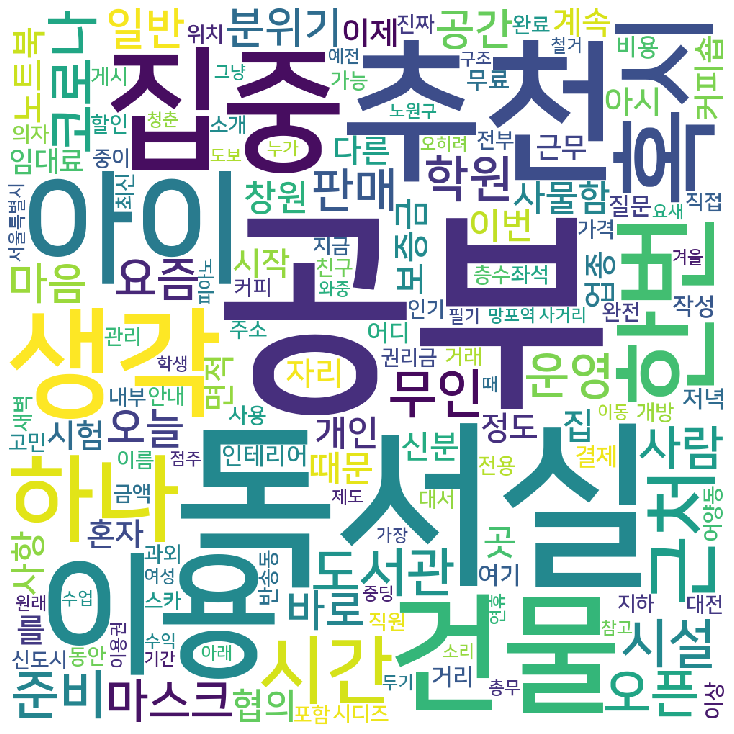

In [4]:
# 텍스트 파일 열기
f = open('cafe_stopword.txt', 'r', encoding  = 'utf-8')
cafe = f.read()

# okt 객체 생성
okt = Okt()
noun = okt.nouns(cafe)

# 한 글자는 제거
for i,v in enumerate(noun):
    if len(v) < 2:
        noun.pop(i)
        
count = Counter(noun)

noun_list = count.most_common(200)

for v in noun_list:
    print(v)
    
noun_dict = dict(noun_list)
noun_dict

wc = WordCloud(font_path = 'C:\\Users\\home\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareB.ttf',
              background_color = 'white',
              width = 1000,  
              height = 1000, 
              max_words = 150, 
              max_font_size = 300).generate_from_frequencies(noun_dict)

plt.figure(figsize = (15,10))
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션 
plt.imshow(wc) # 이미지가 표시되도록 하는 옵션. 
plt.tight_layout(pad = 0)
plt.show()

wc.to_file('cafe_re1.png')

### cafe_name

('급공무원', 24)
('공인', 15)
('사장', 12)
('소상', 12)
('영업', 12)
('공사', 11)
('카페', 10)
('경찰', 9)
('신도시', 7)
('공무원', 7)
('수능', 7)
('사람', 6)
('수만휘', 6)
('만점', 6)
('시험지', 6)
('소방', 6)
('대한민국', 6)
('모임', 5)
('인천', 5)
('중고나라', 4)
('사랑', 4)
('드림', 4)
('인강', 4)
('교육', 4)
('닥', 4)
('동탄', 3)
('취업', 3)
('사모', 3)
('중개사', 3)
('칼라', 3)
('복합기', 3)
('임대', 3)
('렌탈', 3)
('전문', 3)
('프린터', 3)
('시험', 3)
('공기업', 3)
('학원', 3)
('임신', 3)
('육아', 3)
('핫딜', 3)
('대학생', 2)
('경남', 2)
('특목고', 2)
('외고', 2)
('과학', 2)
('고영재', 2)
('수모', 2)
('과목', 2)
('가산', 2)
('합격', 2)
('취사', 2)
('독', 2)
('투', 2)
('공공기관', 2)
('상위', 2)
('시흥', 2)
('연합', 2)
('인연', 2)
('대표', 2)
('민락', 2)
('미즈', 2)
('임산부', 2)
('일산', 2)
('진주', 2)
('디젤', 2)
('매니아', 2)
('일등', 2)
('패션', 2)
('편입', 2)
('건강', 2)
('보험', 2)
('경북', 2)
('도청', 2)
('마미', 2)
('톡톡', 2)
('마북', 1)
('보정', 1)
('엄마', 1)
('투맘', 1)
('심리', 1)
('공모', 1)
('수익', 1)
('블로그', 1)
('애드센스', 1)
('스펙', 1)
('대외', 1)
('활동', 1)
('공모전', 1)
('옥토', 1)
('피아', 1)
('양주', 1)
('옥정', 1)
('주자', 1)
('세종시', 1)
('창원', 1)
('줌마', 1)


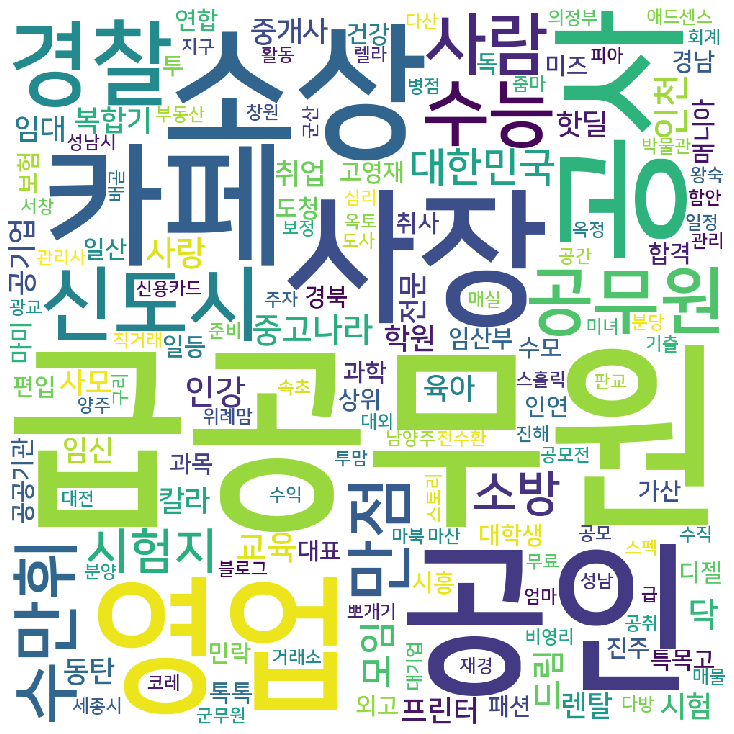

In [5]:
# 텍스트 파일 열기
f = open('cafe_name.txt', 'r', encoding  = 'utf-8')
cafe_name = f.read()

# okt 객체 생성
okt = Okt()
noun = okt.nouns(cafe_name)

# 한 글자는 제거
for i,v in enumerate(noun):
    if len(v) < 2:
        noun.pop(i)
        
count = Counter(noun)

noun_list = count.most_common(200)

for v in noun_list:
    print(v)
    
noun_dict = dict(noun_list)
noun_dict

wc = WordCloud(font_path = 'C:\\Users\\home\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareB.ttf',
              background_color = 'white',
              width = 1000,  
              height = 1000, 
              max_words = 150, 
              max_font_size = 300).generate_from_frequencies(noun_dict)

plt.figure(figsize = (15,10))
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션 
plt.imshow(wc) # 이미지가 표시되도록 하는 옵션. 
plt.tight_layout(pad = 0)
plt.show()

wc.to_file('cafe_name1.png')



### morethan re

('이용', 78)
('스카', 62)
('사용', 54)
('어플', 46)
('노트북', 36)
('무인', 36)
('솔루션', 36)
('소개', 35)
('주변', 35)
('좌석', 35)
('독서실', 35)
('회원', 29)
('가입', 29)
('집중', 28)
('바로', 27)
('예약', 27)
('공부', 26)
('를', 26)
('장점', 19)
('생각', 19)
('다운로드', 19)
('구매', 19)
('눈치', 18)
('운영', 18)
('역', 18)
('접근성', 18)
('작고', 18)
('층', 18)
('위치', 18)
('모어', 18)
('매우', 18)
('동네', 18)
('쿠폰', 18)
('코스', 18)
('인헌', 17)
('근처', 17)
('주소', 17)
('서울시', 17)
('관악구', 17)
('이번', 17)
('추천', 16)
('카카오', 16)
('검색', 16)
('금호', 16)
('스윗', 16)
('금호역', 16)
('더', 16)
('호점', 16)
('영어', 16)
('점', 16)
('통해', 10)
('비밀번호', 10)
('찾기', 10)
('이용권', 10)
('분리', 10)
('보지', 10)
('공유', 9)
('알', 9)
('조금', 9)
('약간', 9)
('탈진', 9)
('오르막', 9)
('건물', 9)
('정면', 9)
('입구', 9)
('권', 9)
('규모', 9)
('게다가', 9)
('개인', 9)
('토론', 9)
('그룹', 9)
('오늘', 9)
('여러가지', 9)
('인테리어', 9)
('아주', 9)
('전화번호', 9)
('글', 9)
('소정', 9)
('원고료', 9)
('제공', 9)
('작성', 9)
('곳', 9)
('출구', 9)
('군데', 9)
('모던', 9)
('오픈', 9)
('한지', 9)
('무료', 9)
('이벤트', 9)
('순삭', 9)
('이기', 9)
('지금', 9)
('카를', 9)


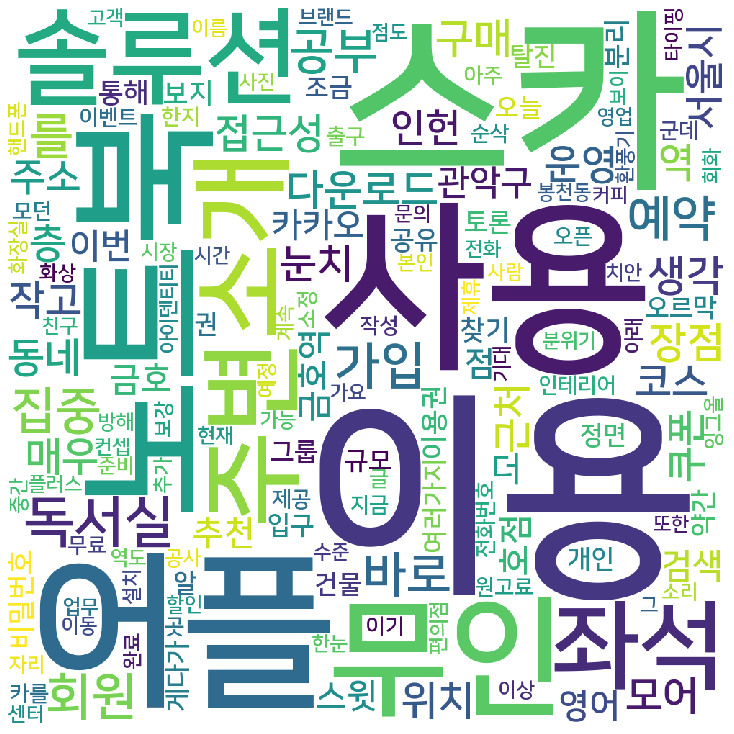

In [6]:
# 텍스트 파일 열기
f = open('morethan_re.txt', 'r', encoding  = 'utf-8')
morethan = f.read()

# okt 객체 생성
okt = Okt()
noun = okt.nouns(morethan)

# 한 글자는 제거
for i,v in enumerate(noun):
    if len(v) < 2:
        noun.pop(i)
        
count = Counter(noun)

noun_list = count.most_common(200)

for v in noun_list:
    print(v)
    
noun_dict = dict(noun_list)
noun_dict

wc = WordCloud(font_path = 'C:\\Users\\home\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareB.ttf',
              background_color = 'white',
              width = 1000,  
              height = 1000, 
              max_words = 150, 
              max_font_size = 300).generate_from_frequencies(noun_dict)

plt.figure(figsize = (15,10))
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션 
plt.imshow(wc) # 이미지가 표시되도록 하는 옵션. 
plt.tight_layout(pad = 0)
plt.show()

wc.to_file('morethan1.png')



### blog re

('이용', 78)
('스카', 62)
('사용', 54)
('어플', 46)
('노트북', 36)
('무인', 36)
('솔루션', 36)
('소개', 35)
('주변', 35)
('좌석', 35)
('독서실', 35)
('회원', 29)
('가입', 29)
('집중', 28)
('바로', 27)
('예약', 27)
('공부', 26)
('를', 26)
('장점', 19)
('생각', 19)
('다운로드', 19)
('구매', 19)
('눈치', 18)
('운영', 18)
('역', 18)
('접근성', 18)
('작고', 18)
('층', 18)
('위치', 18)
('모어', 18)
('매우', 18)
('동네', 18)
('쿠폰', 18)
('코스', 18)
('인헌', 17)
('근처', 17)
('주소', 17)
('서울시', 17)
('관악구', 17)
('이번', 17)
('추천', 16)
('카카오', 16)
('검색', 16)
('금호', 16)
('스윗', 16)
('금호역', 16)
('더', 16)
('호점', 16)
('영어', 16)
('점', 16)
('통해', 10)
('비밀번호', 10)
('찾기', 10)
('이용권', 10)
('분리', 10)
('보지', 10)
('공유', 9)
('알', 9)
('조금', 9)
('약간', 9)
('탈진', 9)
('오르막', 9)
('건물', 9)
('정면', 9)
('입구', 9)
('권', 9)
('규모', 9)
('게다가', 9)
('개인', 9)
('토론', 9)
('그룹', 9)
('오늘', 9)
('여러가지', 9)
('인테리어', 9)
('아주', 9)
('전화번호', 9)
('글', 9)
('소정', 9)
('원고료', 9)
('제공', 9)
('작성', 9)
('곳', 9)
('출구', 9)
('군데', 9)
('모던', 9)
('오픈', 9)
('한지', 9)
('무료', 9)
('이벤트', 9)
('순삭', 9)
('이기', 9)
('지금', 9)
('카를', 9)


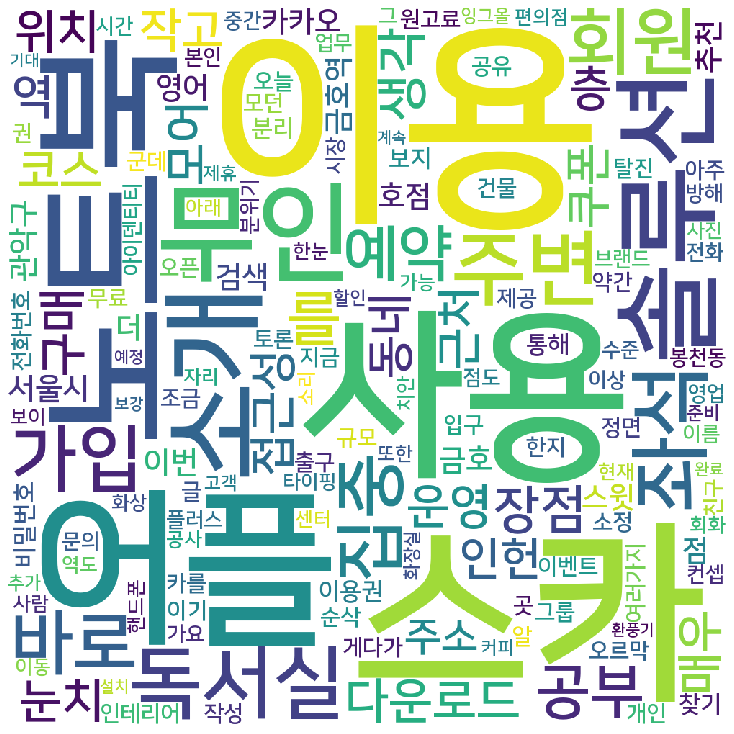

In [7]:
# 텍스트 파일 열기
f = open('blog_re.txt', 'r', encoding  = 'utf-8')
blog = f.read()

# okt 객체 생성
okt = Okt()
noun = okt.nouns(blog)

# 한 글자는 제거
for i,v in enumerate(noun):
    if len(v) < 2:
        noun.pop(i)
        
count = Counter(noun)

noun_list = count.most_common(200)

for v in noun_list:
    print(v)
    
noun_dict = dict(noun_list)
noun_dict

wc = WordCloud(font_path = 'C:\\Users\\home\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareB.ttf',
              background_color = 'white',
              width = 1000,  
              height = 1000, 
              max_words = 150, 
              max_font_size = 300).generate_from_frequencies(noun_dict)

plt.figure(figsize = (15,10))
plt.axis("off") # 축에 표시되는 눈금을 제거하는 옵션 
plt.imshow(wc) # 이미지가 표시되도록 하는 옵션. 
plt.tight_layout(pad = 0)
plt.show()

wc.to_file('blog1.png')

